# Who performs better?

Hooray, you have seen all the classifiers. But who is better? There is no clear answer on that. Every classifier is good in different tasks. But you cannot know by heart. The most efficient way to find out who performs beteer is to test them. 

And here is the challenge. You have [this](https://www.kaggle.com/uciml/mushroom-classification) dataset and you need to clean, organize, etc the data, apply all the classifiers we have presented you (or if you fine any other interesting classifier, feel free to test him too), and see the results. Do a comparizon and finally decide who is "better fit" for this dataset. 

If you find this exciting, or you finish early, feel free to do the same in a dataset of your preference. 

Deadline: TBD

# Libraries

In [107]:
# Import libraries
import warnings

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


from sklearn import tree
from sklearn import metrics
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

In [108]:
# Ignore warnings
warnings.filterwarnings('ignore')

In [140]:
# Set seed for reproducibility
SEED =0

# Preprocessing Data

In [110]:
df = pd.read_csv('mushrooms.csv')
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [111]:
# All the columns have categorical value.
# 22 features (independent variables) and a dependent variable (class).

In [112]:
df.shape
# df.drop(['class'], axis=1).shape
# len(df.drop(['class'], axis=1).columns)

(8124, 23)

In [113]:
# Declare feature vector and target variable
Xi = df.drop(['class'], axis = 1)
y = df['class']

In [114]:
print ("Features: ",Xi.columns)

Features:  Index(['cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
       'ring-type', 'spore-print-color', 'population', 'habitat'],
      dtype='object')


In [115]:
print('Target:\n', y.value_counts())

Target:
 e    4208
p    3916
Name: class, dtype: int64


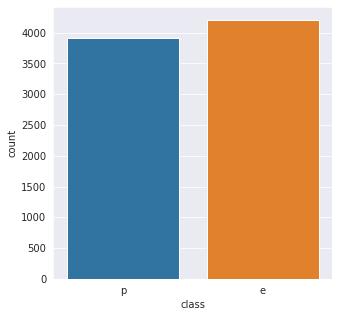

In [116]:
# In the given dataset we have 3916 poisonous mushrooms and 4208 edible mushrooms

# Visualize the number of mushrooms that fall in each class - p = poisonous, e=edible
plt.figure(figsize=(5, 5))
s = sns.countplot(x = "class", data = df)

plt.show()

In [145]:
# Perform label encoding on the data
for col in df.columns:
    df[col] = LabelEncoder().fit_transform(df[col])
 
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,...,2,7,7,0,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,7,7,0,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,7,7,0,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,7,7,0,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,7,7,0,2,1,0,3,0,1


In [146]:
# X = df.iloc[:,1:]
# y = df.iloc[:,0]

In [147]:
# Declare feature vector and target variable
X = df.drop(['class'], axis = 1)
y = df['class']

In [148]:
X.isnull().sum()

cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

In [149]:
# Encode categorical variables
# Normalize feature vector
# Scale the data to be between -1 and 1

X_d = pd.get_dummies(X)

y = LabelEncoder().fit_transform(y)

X = StandardScaler().fit_transform(X)

In [150]:
#  print(X_d)
#  print(X)

In [151]:
print(y)

[1 0 0 ... 0 1 0]


# Principal Component Analysis PCA

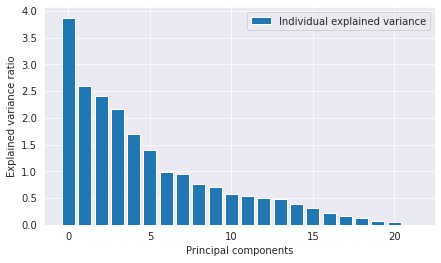

array([[-0.5743219 , -0.97578135, -1.22176154, ..., -0.51996599,
        -0.78254366,  1.12025933],
       [-2.2821023 ,  0.27906633, -1.20049669, ..., -0.11307822,
        -0.73093408, -0.01817413],
       [-1.85803562, -0.27097236, -1.37237069, ...,  0.01652548,
        -0.6561675 ,  0.10791396],
       ...,
       [-1.62151632, -0.75753671,  2.73357994, ..., -0.51961303,
        -0.70768708,  0.22578534],
       [ 3.67060561, -1.0327745 ,  0.1684595 , ..., -0.08688401,
        -0.11464249, -0.14801392],
       [-1.57520272, -1.2285814 ,  2.44722789, ...,  0.91606764,
        -0.77988482, -0.30141893]])

In [152]:
# Import PCA
from sklearn.decomposition import PCA

# Note: We can avoid PCA here since the dataset is small.
pca = PCA()
pca.fit_transform(X)

# View explained_variance
explained_variance = pca.explained_variance_

# Visualize explained_variance
plt.figure(figsize=(7, 4))
plt.bar(range(Xi.shape[1]), explained_variance, label='Individual explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.legend(loc='best')
plt.show()

# The last 4 components has less amount of variance of the data.The 1st 17 components retains more than 90% of the data.
# Perform PCA by taking 17 components with maximum Variance
pca = PCA(n_components=17)
pca.fit_transform(X)

# Gaussian Naive Bayes


Model accuracy score with Gaussian Naive Bayes : 0.914

Area Under the Receiver Operating Characteristic Curve (ROC AUC) : 0.915

Number of mislabeled points from 2031 points : 174

Cross Validation score:
 [0.59778598 0.78843788 0.97908979 0.9803198  0.84852217 0.81773399
 0.8091133  0.81650246 0.85098522 0.97536946]

Average 10-Fold CV score:0.8463860057319785


Confusion matrix

 [[966  95]
 [ 79 891]]


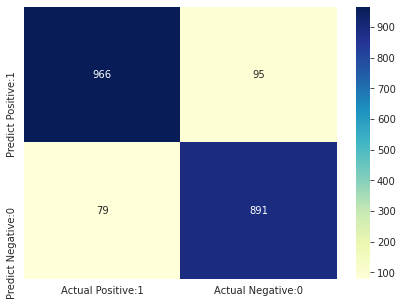



Classification Report

               precision    recall  f1-score   support

           0       0.92      0.91      0.92      1061
           1       0.90      0.92      0.91       970

    accuracy                           0.91      2031
   macro avg       0.91      0.91      0.91      2031
weighted avg       0.91      0.91      0.91      2031



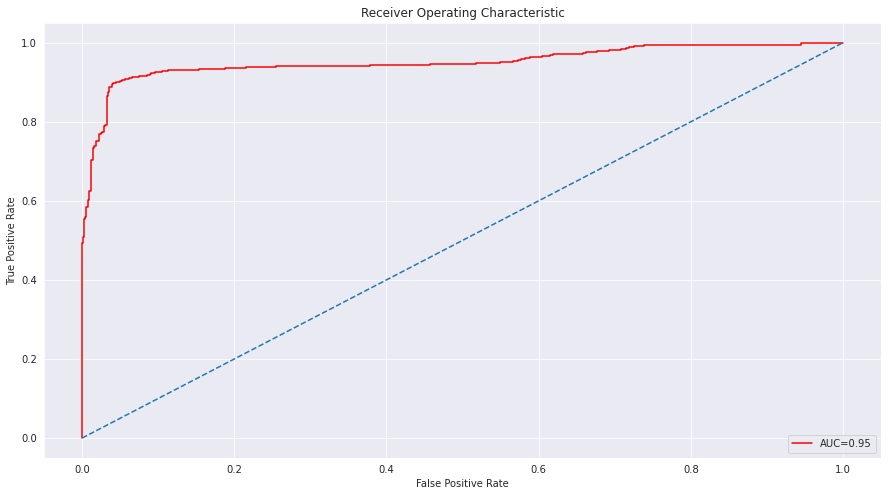

In [125]:
# Import Gaussian Naive Bayes model
from sklearn.naive_bayes import GaussianNB

# Split the dataset 75% training set & 25% test set
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25,random_state=SEED)

# Instantiate the classifier
GNB = GaussianNB()

# Fit the classifier to the training set
GNB.fit(X_train, y_train)

#Predict on the test set
y_pred = GNB.predict(X_test)

# Check accuracy score 
ac_gnb = accuracy_score(y_test, y_pred)
print('\nModel accuracy score with Gaussian Naive Bayes : {0:0.3f}'. format(ac_gnb))
# acc_score.append(ac)

# Compute Area Under the Receiver Operating Characteristic Curve (ROC AUC) from prediction scores.
roc_ac = roc_auc_score(y_test, y_pred)
print('\nArea Under the Receiver Operating Characteristic Curve (ROC AUC) : {0:0.3f}'. format(roc_ac))

# Compute mislabeled points
print("\nNumber of mislabeled points from %d points : %d" % (X_test.shape[0],(y_test!= y_pred).sum()))

# Compute Cross Validation with k=10
cv_scores = cross_val_score(GNB, X, y, cv=10, scoring='accuracy')
print('\nCross Validation score:\n', cv_scores)
print('\nAverage 10-Fold CV score:{}'.format(np.mean(cv_scores)))

# Model Evaluation using Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print('\n\nConfusion matrix\n\n', cm)

# Visualize Confusion Matrix using Heatmap
plt.figure(figsize=(8, 6))
cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')
plt.show()

# Classification report
print('\n\nClassification Report\n\n',classification_report(y_test, y_pred))

# ROC curve : provides a way to visually evaluate models
# It shows the tradeoff between sensitivity and specificity.
# Plot of the true positive rate(tpr)  against the false positive rate(fpr)

# Compute predicted probabilities: y_pred_prob
y_pred_proba = GNB.predict_proba(X_test)[:,1]

# Generate ROC curve values: fpr, tpr, thresholds
fpr, tpr, thresholds = roc_curve(y_test,  y_pred_proba)
auc = roc_auc_score(y_test, y_pred_proba)

# Plot ROC curve
plt.figure(figsize=(8, 8))
plt.plot(fpr,tpr,label = "AUC=%0.2f" %auc, color = 'red')
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1], linestyle = '--')
plt.title('Receiver Operating Characteristic')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# Logistic Regression


Model accuracy score with Logistic Regression : 0.956

Area Under the Receiver Operating Characteristic Curve (ROC AUC) : 0.955


Confusion matrix

 [[820  32]
 [ 40 733]]


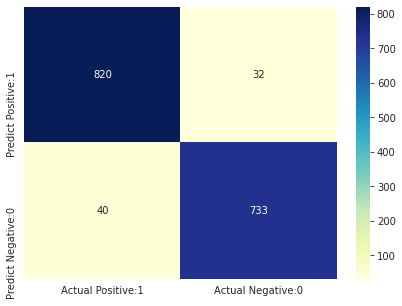



Classification Report

               precision    recall  f1-score   support

           0       0.95      0.96      0.96       852
           1       0.96      0.95      0.95       773

    accuracy                           0.96      1625
   macro avg       0.96      0.96      0.96      1625
weighted avg       0.96      0.96      0.96      1625



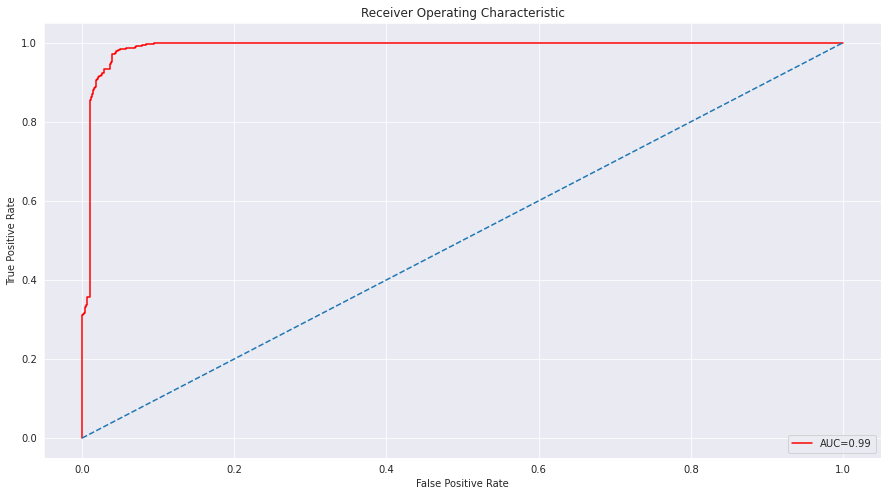

In [126]:
# Import Logistic Regression model
from sklearn.linear_model import LogisticRegression

# Split the dataset 80% training set & 20% test set
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=SEED)

# Instantiate the classifier
LR = LogisticRegression()

# Fit the classifier to the training set
LR.fit(X_train, y_train)

#Predict on the test set
y_pred=LR.predict(X_test)

# Check accuracy score 
ac_lg = accuracy_score(y_test, y_pred)
print('\nModel accuracy score with Logistic Regression : {0:0.3f}'. format(ac_lg))
# acc_score.append(ac)

# Compute Area Under the Receiver Operating Characteristic Curve (ROC AUC) from prediction scores.
roc_ac = roc_auc_score(y_test, y_pred)
print('\nArea Under the Receiver Operating Characteristic Curve (ROC AUC) : {0:0.3f}'. format(roc_ac))

# Model Evaluation using Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print('\n\nConfusion matrix\n\n', cm)

# Visualize Confusion Matrix using Heatmap
plt.figure(figsize=(8, 6))
cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')
plt.show()

# Classification report
print('\n\nClassification Report\n\n',classification_report(y_test, y_pred))

# ROC curve : provides a way to visually evaluate models
# It shows the tradeoff between sensitivity and specificity.
# Plot of the true positive rate(tpr)  against the false positive rate(fpr)
# Class prediction probabilities  
# Compute predicted probabilities: y_pred_prob
y_pred_proba = LR.predict_proba(X_test)[:,1]

# Generate ROC curve values: fpr, tpr, thresholds
fpr, tpr, thresholds = roc_curve(y_test,  y_pred_proba)
auc = roc_auc_score(y_test, y_pred_proba)

# Plot ROC curve
plt.figure(figsize=(8, 8))
plt.plot(fpr,tpr,label = "AUC=%0.2f" %auc, color = 'red')
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],linestyle = '--')
plt.title('Receiver Operating Characteristic')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# Votting Classifier

Models accuracy:
----------------
Logistic Regression : 0.956
Gaussian Naive Bayes : 0.916
Support Vector Machine : 1.000
Random Forest : 1.000
Voting Classifier: 0.980

Area Under the Receiver Operating Characteristic Curve (ROC AUC) : 0.979


Confusion matrix

 [[852   0]
 [ 32 741]]


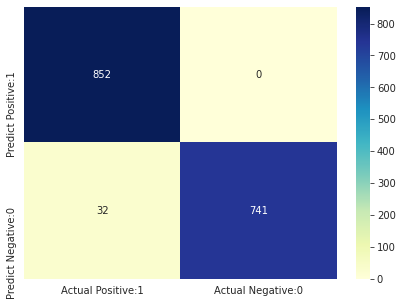



Classification Report

               precision    recall  f1-score   support

           0       0.96      1.00      0.98       852
           1       1.00      0.96      0.98       773

    accuracy                           0.98      1625
   macro avg       0.98      0.98      0.98      1625
weighted avg       0.98      0.98      0.98      1625



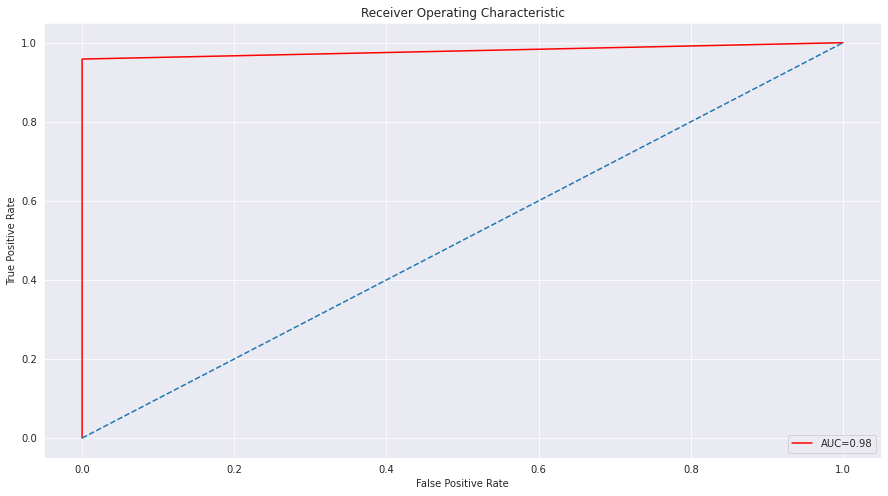

In [127]:
# Import the package
from sklearn.ensemble import VotingClassifier

# Define the list classifiers
classifiers = [('Logistic Regression', LR), ('Gaussian Naive Bayes', GNB), ('Support Vector Machine', svm), \
               ('Random Forest', RF)]

print('Models accuracy:')
print('----------------')

# Iterate over the pre-defined list of classifiers
for clf_name, clf in classifiers:    
 
    # Fit clf to the training set
    clf.fit(X_train, y_train)    
   
    # Predict y_pred
    y_pred = clf.predict(X_test)
    
    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred) 
   
    # Evaluate clf's accuracy on the test set
    print('{:s} : {:.3f}'.format(clf_name, accuracy))
    
    
# Instantiate the classifier
vc = VotingClassifier(estimators = classifiers)

# Fit the classifier to the training set
vc.fit(X_train, y_train)   

# Evaluate the test set predictions
y_pred = vc.predict(X_test)

# Calculate accuracy score
ac_vc = accuracy_score(y_test, y_pred)
print('Voting Classifier: {:.3f}'.format(ac_vc))
# acc_score.append(ac)

# Compute Area Under the Receiver Operating Characteristic Curve (ROC AUC) from prediction scores.
roc_ac = roc_auc_score(y_test, y_pred)
print('\nArea Under the Receiver Operating Characteristic Curve (ROC AUC) : {0:0.3f}'. format(roc_ac))

# Model Evaluation using Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print('\n\nConfusion matrix\n\n', cm)

# Visualize Confusion Matrix using Heatmap
plt.figure(figsize=(8, 6))
cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')
plt.show()

# Classification report
print('\n\nClassification Report\n\n',classification_report(y_test, y_pred))

# Compute predicted probabilities: y_pred_prob
#y_pred_proba = vc.predict_proba(X_test)[:,1]

# Generate ROC curve values: fpr, tpr, thresholds
fpr, tpr, thresholds = roc_curve(y_test,  y_pred)

# Plot ROC curve
plt.figure(figsize=(8, 8))
plt.plot(fpr,tpr,label = "AUC=%0.2f" %roc_ac, color = 'red')
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1], linestyle = '--')
plt.title('Receiver Operating Characteristic')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# Random Forest

odor                        0.142374
gill-size                   0.119185
spore-print-color           0.107542
gill-color                  0.076031
bruises                     0.072383
ring-type                   0.065108
population                  0.063693
stalk-root                  0.059324
gill-spacing                0.058120
stalk-surface-above-ring    0.050654
stalk-surface-below-ring    0.048455
habitat                     0.036563
stalk-shape                 0.026281
stalk-color-above-ring      0.014793
stalk-color-below-ring      0.014537
cap-color                   0.014132
ring-number                 0.010991
cap-surface                 0.008716
veil-color                  0.005270
cap-shape                   0.004506
gill-attachment             0.001341
veil-type                   0.000000
dtype: float64


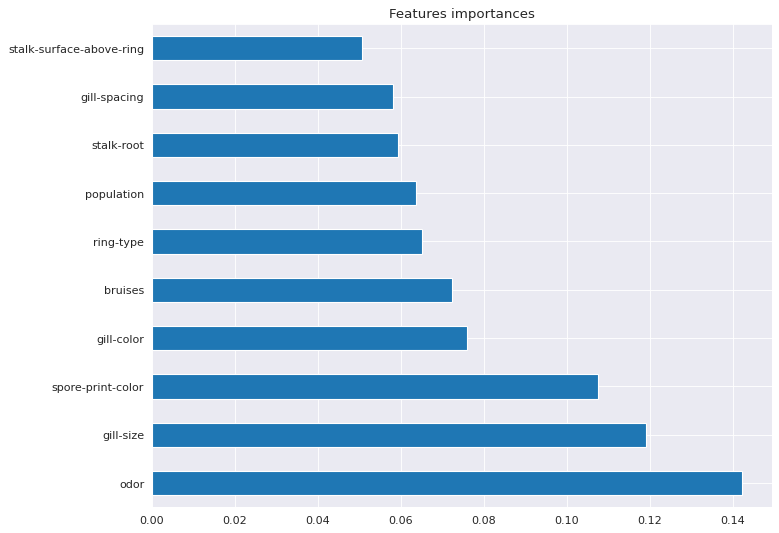


 Model accuracy score with 100 decision-trees : 1.000

 Confusion matrix

 [[1272    0]
 [   0 1166]]


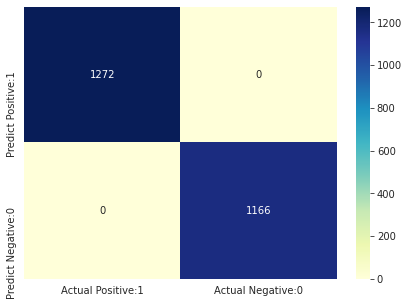



 Classification Report

               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1272
           1       1.00      1.00      1.00      1166

    accuracy                           1.00      2438
   macro avg       1.00      1.00      1.00      2438
weighted avg       1.00      1.00      1.00      2438



In [128]:
# Import Random Forest model
from sklearn.ensemble import RandomForestClassifier

# Split the dataset 70% training set & 30% test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = SEED)

# Instantiate the classifier with n_estimators = 100
RF = RandomForestClassifier(n_estimators=100, random_state=0)

# Fit the classifier to the training set
RF.fit(X_train, y_train)

# Predict on the test set
y_pred = RF.predict(X_test)

# View the feature scores
feature_scores = pd.Series(RF.feature_importances_, index=X_d.columns).sort_values(ascending=False)
print(feature_scores)

# Visualize feature importance

plt.figure(num=None, figsize=(10,8), dpi=80, facecolor='w', edgecolor='k')

feat_importances = pd.Series(RF.feature_importances_, index= X_d.columns)

feat_importances.nlargest(10).plot(kind='barh')
plt.title('Features importances')
plt.show()

# Check accuracy score 
ac_rf = accuracy_score(y_test, y_pred)
print('\n Model accuracy score with 100 decision-trees : {0:0.3f}'. format(ac_rf))
# acc_score.append(ac)

# Model Evaluation using Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print('\n Confusion matrix\n\n', cm)

# Visualize Confusion Matrix using Heatmap
plt.figure(figsize=(8, 6))
cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')
plt.show()
# Classification report
print('\n\n Classification Report\n\n',classification_report(y_test, y_pred))

# Support Vector Machine SVM


Model accuracy score with SVM : 1.000

Area Under the Receiver Operating Characteristic Curve (ROC AUC) : 1.000


Confusion matrix

 [[1061    0]
 [   0  970]]


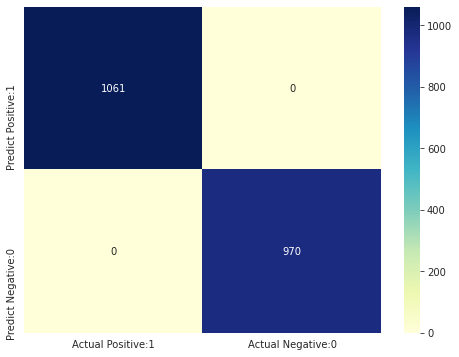



Classification Report

               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1061
           1       1.00      1.00      1.00       970

    accuracy                           1.00      2031
   macro avg       1.00      1.00      1.00      2031
weighted avg       1.00      1.00      1.00      2031



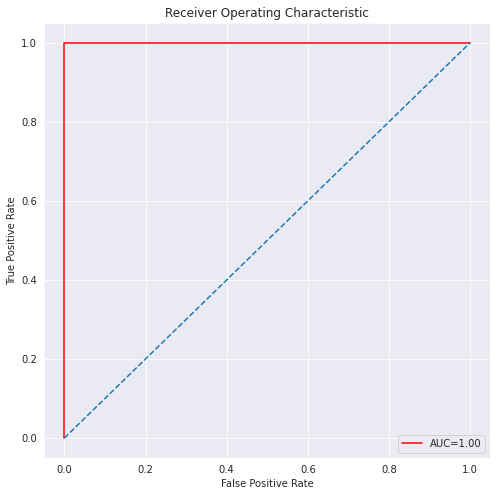

In [155]:
#Import svm model
from sklearn.svm import SVC

# Split the dataset 75% training set & 25% test set
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25,random_state=SEED)

# Instantiate the classifier
svm = SVC()

# Fit the classifier to the training set
svm.fit(X_train, y_train)

# Predict on the test set
y_pred = svm.predict(X_test)

# Check accuracy score 
ac_svm = accuracy_score(y_test, y_pred)
print('\nModel accuracy score with SVM : {0:0.3f}'. format(ac_svm))
# acc_score.append(ac)

# Compute Area Under the Receiver Operating Characteristic Curve (ROC AUC) from prediction scores.
roc_ac = roc_auc_score(y_test, y_pred)
print('\nArea Under the Receiver Operating Characteristic Curve (ROC AUC) : {0:0.3f}'. format(roc_ac))

# Model Evaluation using Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print('\n\nConfusion matrix\n\n', cm)

# Visualize Confusion Matrix using Heatmap
plt.figure(figsize=(8, 6))
cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')
plt.show()

# Classification report
print('\n\nClassification Report\n\n',classification_report(y_test, y_pred))

# Generate ROC curve values: fpr, tpr, thresholds
fpr, tpr, thresholds = roc_curve(y_test,  y_pred)

# Plot ROC curve
plt.figure(figsize=(8, 8))
plt.plot(fpr,tpr,label = "AUC=%0.2f" %roc_ac, color = 'red')
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1], linestyle = '--')
plt.title('Receiver Operating Characteristic')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# Compare

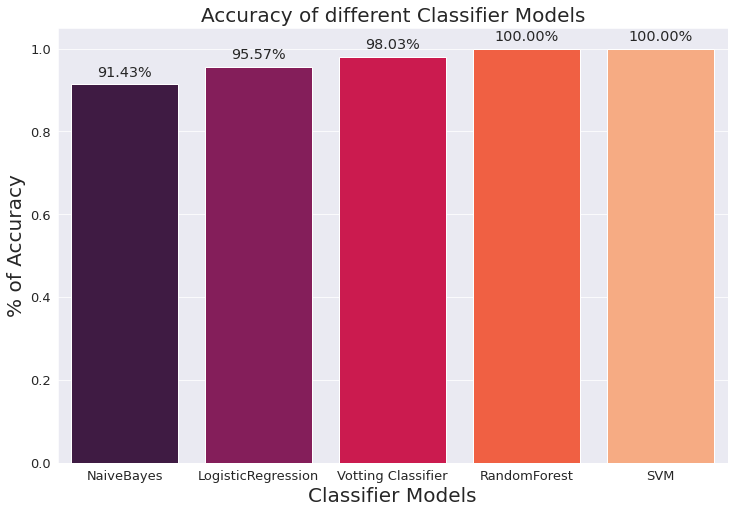

In [138]:
# Accuracy score for diffrent models
# Printing accuracy score of all the applied classification models 
acc_score=[]
acc_score.extend([ac_gnb, ac_lg, ac_vc, ac_rf, ac_svm])
# print(acc_score)
# List of all the applied classifiers
models = ['NaiveBayes', 'LogisticRegression', 'Votting Classifier', 'RandomForest','SVM']

# Visualising the accuracy score of each classification model
plt.figure(figsize=(12, 8))
sns.set_style("darkgrid")
ax = sns.barplot(x=models, y=acc_score, palette = "rocket", saturation =1.5)
plt.xlabel("Classifier Models", fontsize = 20 )
plt.ylabel("% of Accuracy", fontsize = 20)
plt.title("Accuracy of different Classifier Models", fontsize = 20)
plt.xticks(fontsize = 13, horizontalalignment = 'center', rotation = 0)
plt.yticks(fontsize = 13)
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height:.2%}', (x + width/2, y + height*1.02), ha='center', fontsize = 'x-large')
plt.show()

In [663]:
# df = pd.read_csv('mushrooms.csv')
# # Declare feature vector and target variable
# X = df.drop(['class'], axis = 1)
# y = df['class']

# # Encode categorical variables
# X_d = pd.get_dummies(X)

# y = LabelEncoder().fit_transform(y)

# # Normalize feature vector
# X = StandardScaler().fit_transform(X_d)

# # Split the dataset 70% training set & 30% test set
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 0)
# # instantiate the classifier with n_estimators = 100
# RF = RandomForestClassifier(n_estimators=100, random_state=0)
# # fit the classifier to the training set
# RF.fit(X_train, y_train)
# # predict on the test set
# y_pred = RF.predict(X_test)


# # view the feature scores
# feature_scores = pd.Series(RF.feature_importances_, index=X_d.columns).sort_values(ascending=False)

# feature_scores

In [662]:
# Creating a seaborn bar plot

# ax = plt.figure(figsize=(15, 30))
# ax = sns.barplot(x=feature_scores, y=feature_scores.index, data=df)
# ax.set_title("Visualize feature scores of the features")
# ax.set_yticklabels(feature_scores.index)
# ax.set_xlabel("Feature importance score")
# ax.set_ylabel("Features")
# plt.show()